In [1296]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import warnings
import opendatasets as od
import json
from sklearn.preprocessing import LabelEncoder

# Download the dataset

In [1297]:
os.chdir('../Datasets/')
dataset = 'https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset'
od.download(dataset)
dataset = 'https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata'
od.download(dataset)
os.chdir('../py_notebooks/')

Skipping, found downloaded files in "./the-movies-dataset" (use force=True to force download)
Skipping, found downloaded files in "./tmdb-movie-metadata" (use force=True to force download)


# Loading the data set 

In [1298]:
df = pd.read_csv("/home/abhinav/Datasets/the-movies-dataset/credits.csv")
# df = df.sample(frac = 1).reset_index()
# df.drop('index', axis=1, inplace=True)

In [1299]:
df.shape

(45476, 3)

# Let's Explore the data set 

In [1300]:
df1=pd.read_csv('../Datasets/tmdb-movie-metadata/tmdb_5000_credits.csv')
df2=pd.read_csv('../Datasets/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [1301]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [1302]:
df2.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [1303]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [1304]:
C= df2['vote_average'].mean()
C

6.092171559442011

In [1305]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [1306]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

In [1307]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [1308]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [1309]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

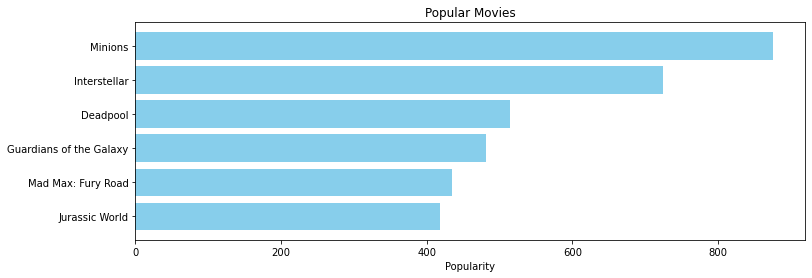

In [1310]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

## Preprocessing

In [1311]:
genres = {}
done = []
index = 0
add_gen = []
for i in range(len(df2)):
    curr = []
    res = json.loads(df2.loc[i, "genres"])
    for j in range(len(res)):
        if(res[j]["name"] not in done):
            done.append(res[j]["name"])
            genres[res[j]["name"]] = index
            index+=1
        curr.append(genres[res[j]["name"]])
    add_gen.append(curr)

In [1312]:
genres

{'Action': 0,
 'Adventure': 1,
 'Fantasy': 2,
 'Science Fiction': 3,
 'Crime': 4,
 'Drama': 5,
 'Thriller': 6,
 'Animation': 7,
 'Family': 8,
 'Western': 9,
 'Comedy': 10,
 'Romance': 11,
 'Horror': 12,
 'Mystery': 13,
 'History': 14,
 'War': 15,
 'Music': 16,
 'Documentary': 17,
 'Foreign': 18,
 'TV Movie': 19}

In [1313]:
df2.drop('genres', axis=1, inplace=True)
df2['genres'] = add_gen

In [1314]:
keywords = {}
done = []
index = 0
add_gen = []
for i in range(len(df2)):
    curr = []
    res = json.loads(df2.loc[i, "keywords"])
    #edit
    s = ""
    for j in range(len(res)):
        if(res[j]["name"] not in done):
            done.append(res[j]["name"])
            keywords[res[j]["name"]] = index
            index+=1
            #edit
            s = res[j]["name"]
            
#         curr.append(keywords[res[j]["name"]])
        #edit
        if(s != ""):
            curr.append(s.lower().replace(' ', ''))
    add_gen.append(curr)

In [1315]:
keywords

{'culture clash': 0,
 'future': 1,
 'space war': 2,
 'space colony': 3,
 'society': 4,
 'space travel': 5,
 'futuristic': 6,
 'romance': 7,
 'space': 8,
 'alien': 9,
 'tribe': 10,
 'alien planet': 11,
 'cgi': 12,
 'marine': 13,
 'soldier': 14,
 'battle': 15,
 'love affair': 16,
 'anti war': 17,
 'power relations': 18,
 'mind and soul': 19,
 '3d': 20,
 'ocean': 21,
 'drug abuse': 22,
 'exotic island': 23,
 'east india trading company': 24,
 "love of one's life": 25,
 'traitor': 26,
 'shipwreck': 27,
 'strong woman': 28,
 'ship': 29,
 'alliance': 30,
 'calypso': 31,
 'afterlife': 32,
 'fighter': 33,
 'pirate': 34,
 'swashbuckler': 35,
 'aftercreditsstinger': 36,
 'spy': 37,
 'based on novel': 38,
 'secret agent': 39,
 'sequel': 40,
 'mi6': 41,
 'british secret service': 42,
 'united kingdom': 43,
 'dc comics': 44,
 'crime fighter': 45,
 'terrorist': 46,
 'secret identity': 47,
 'burglar': 48,
 'hostage drama': 49,
 'time bomb': 50,
 'gotham city': 51,
 'vigilante': 52,
 'cover-up': 53,
 

In [1316]:
df2.drop('keywords', axis=1, inplace=True)
df2['keywords'] = add_gen

In [1317]:
production_companies = {}
done = []
index = 0
add_gen = []
for i in range(len(df2)):
    curr = []
    res = json.loads(df2.loc[i, "production_companies"])
    for j in range(len(res)):
        if(res[j]["name"] not in done):
            done.append(res[j]["name"])
            production_companies[res[j]["name"]] = index
            index+=1
        curr.append(production_companies[res[j]["name"]])
    add_gen.append(curr)

In [1318]:
df2.drop('production_companies', axis=1, inplace=True)
df2['production_companies'] = add_gen

In [1319]:
production_countries = {}
done = []
index = 0
add_gen = []
for i in range(len(df2)):
    curr = []
    res = json.loads(df2.loc[i, "production_countries"])
    for j in range(len(res)):
        if(res[j]["name"] not in done):
            done.append(res[j]["name"])
            production_countries[res[j]["name"]] = index
            index+=1
        curr.append(production_countries[res[j]["name"]])
    add_gen.append(curr)

In [1320]:
df2.drop('production_countries', axis=1, inplace=True)
df2['production_countries'] = add_gen

In [1321]:
languages = {}
done = []
index = 0
add_gen = []
for i in range(len(df2)):
    curr = []
    res = json.loads(df2.loc[i, 'spoken_languages'])
    for j in range(len(res)):
        if(res[j]["iso_639_1"] not in done):
            done.append(res[j]["iso_639_1"])
            languages[res[j]["iso_639_1"]] = index
            index+=1
        curr.append(languages[res[j]["iso_639_1"]])
    add_gen.append(curr)

In [1322]:
df2.drop('spoken_languages', axis=1, inplace=True)
df2['spoken_languages'] = add_gen

In [1323]:
add_gen = []
for i in range(len(df2)):
    curr = []
    res = df2.loc[i, "original_language"]
    if(res not in done):
        done.append(res)
        languages[res] = index
        index+=1
    add_gen.append(languages[res])

In [1324]:
df2.drop("original_language", axis=1, inplace=True)
df2["original_language"] = add_gen

In [1325]:
character = {}
gender = {'Male': 0, 'Female': 1, 'Undefined': 2}
actorname = {}
index_char = 0
index_cast = 0
male = []
female = []
undefined = []
add_char = []
add_actors = []
for i in range(len(df2)):
    curr_actors = []
    curr_char = []
    curr_m = 0
    curr_f = 0
    curr_u = 0
    res = json.loads(df2.loc[i, 'cast'])
    #edit
    s = ""
    for j in range(len(res)):
        if(res[j]['character'] not in character.keys()):
            character[res[j]['character']] = index_char
            index_char += 1
        #edit
        s = res[j]['character']
        
#         curr_char.append(character[res[j]['character']])
        #edit
        curr_char.append(s.lower().replace(' ', ''))
        
        if(res[j]['name'] not in actorname.keys()):
            actorname[res[j]['name']] = index_cast
            index_cast += 1
        #edit
        s = res[j]['name']
        
#         curr_actors.append(actorname[res[j]['name']])
        #edit
        curr_actors.append(s.lower().replace(' ', ''))
        
        if(res[j]['gender'] == 0):
            curr_m += 1
        elif(res[j]['gender'] == 1):
            curr_f += 1
        elif(res[j]['gender'] == 2):
            curr_u += 1
    male.append(curr_m)
    female.append(curr_f)
    undefined.append(curr_u)
    add_char.append(curr_char)
    add_actors.append(curr_actors)

In [1326]:
df2.drop('cast', axis=1, inplace=True)
df2["actors"] = add_actors
df2["characters"] = add_char
df2["male_count"] = male
df2["female_count"] = female
df2["undefined_gender_count"] = undefined

In [1327]:
director = []
director_name = {}
dd = 0
index_d = 0
for i in range(len(df2)):
    res = json.loads(df2.loc[i, 'crew'])
    dd = 0
    for j in range(len(res)):
        if(res[j]["job"] == 'Director' and dd == 0):
            if(res[j]["name"] not in director_name.keys()):
                director_name[res[j]["name"]] = index_d
                index_d += 1
            director.append(director_name[res[j]["name"]])
            dd = 1
    if(dd == 0):
        director_name["Director Name Not Available"] = -1
        director.append(-1)

In [1328]:
df2.drop('crew', axis=1, inplace=True)
df2["director"] = director

In [1329]:
df2.drop('homepage', axis=1, inplace=True)
df2.drop('tittle', axis=1, inplace=True)

In [1330]:
# overview,release_date,runtime,tagline

In [1331]:
df2["overview"] = df2["overview"].astype(str)
df2["release_date"] = df2["release_date"].astype(str)
df2["tagline"] = df2["tagline"].astype(str)
df2["status"] = df2["status"].astype(str)

In [1332]:
for i in range(len(df2)):
    res = df2.loc[i, "overview"]
    if(res == 'nan'):
        df2.loc[i, "overview"] = ""
        
    res = df2.loc[i, "release_date"]
    if(res == 'nan'):
        df2.loc[i, "release_date"] = ""
        
    res = df2.loc[i, "tagline"]
    if(res == 'nan'):
        df2.loc[i, "tagline"] = ""
        
    res = df2.loc[i, "status"]
    if(res == 'nan'):
        df2.loc[i, "status"] = ""

In [1333]:
df2["runtime"].fillna(-1, inplace = True)

In [1334]:
# All NULLs Handled
features = list(df2.columns.values)
for i in features:
    bool_series = pd.notnull(df2[i])
    print(len(df2[bool_series]))

4803
4803
4803
4803
4803
4803
4803
4803
4803
4803
4803
4803
4803
4803
4803
4803
4803
4803
4803
4803
4803
4803
4803
4803
4803


In [1335]:
# encoding status
status_classes = list(df2["status"].unique())
status_classes

['Released', 'Post Production', 'Rumored']

In [1336]:
label_encoder = LabelEncoder()

In [1337]:
df2["status_en"] = label_encoder.fit_transform(df2["status"])

In [1338]:
df2["status"].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [1339]:
df2["status"].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [1340]:
encode_dict = dict(df2["status_en"].value_counts())

In [1341]:
encode_dict2 = df2["status"].value_counts()

In [1342]:
status_list = [0]*len(encode_dict)
for i in encode_dict.keys():
    for j in encode_dict2.keys():
        if(encode_dict[i] == encode_dict2[j]):
            status_list[i] = j


In [1343]:
status = {}
for i in range(len(status_list)):
    status[status_list[i]] = i

In [1344]:
df2.drop('status', axis=1, inplace=True)
df2.rename(columns = {'status_en':'status'}, inplace = True)

In [1345]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   budget                  4803 non-null   int64  
 1   id                      4803 non-null   int64  
 2   original_title          4803 non-null   object 
 3   overview                4803 non-null   object 
 4   popularity              4803 non-null   float64
 5   release_date            4803 non-null   object 
 6   revenue                 4803 non-null   int64  
 7   runtime                 4803 non-null   float64
 8   tagline                 4803 non-null   object 
 9   title                   4803 non-null   object 
 10  vote_average            4803 non-null   float64
 11  vote_count              4803 non-null   int64  
 12  genres                  4803 non-null   object 
 13  keywords                4803 non-null   object 
 14  production_companies    4803 non-null   

In [1346]:
#genres,keywords,languages,production_countries,production_companies,character,gender,actorname,director_name,status

In [1347]:
df2.to_csv('tmdb_encoded_genres_keywords_languages_productioncountries_productioncompanies_character_gender_actorname_directorname_status.csv')

In [1348]:
with open("encode_info1.json", "w") as fh:
    json.dump([genres,keywords,languages,production_countries,production_companies,character,gender,actorname,director_name,status],fh)

In [1349]:
with open("encode_info1.json") as fh:
    data = json.load(fh)

genres = data[0]
keywords = data[1]
languages = data[2]
production_countries = data[3]
production_companies = data[4]
character = data[5]
gender = data[6]
actorname = data[7]
director_name = data[8]
status = data[9]

## EDA

### Movie Distribution per director

In [1350]:
director_movie_counts = dict(df2.director.value_counts())

In [1351]:
# director_name_rev = dict(zip(director_name.values(), director_name.keys()))
counts = [0] * len(director_name)

In [1352]:
for i in director_movie_counts.keys():
    counts[i] = director_movie_counts[i]

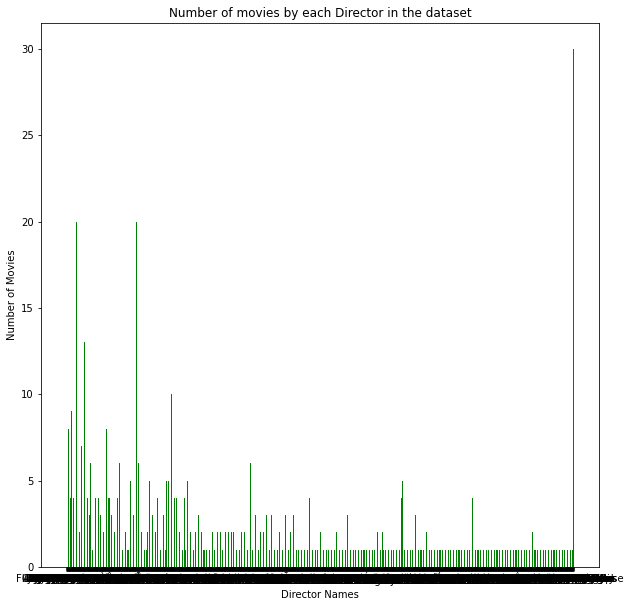

In [1353]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.xlabel("Director Names")
plt.ylabel("Number of Movies")
plt.title("Number of movies by each Director in the dataset")
plt.bar(list(director_name), counts, color ='green', width = 0.4)
plt.show()

A better of plot for the above analysis ka be the following

In [1354]:
counts = [0] * max(director_movie_counts.values())
label = list(range(1, max(director_movie_counts.values())+1))

In [1355]:
for i in director_movie_counts.values():
    counts[i-1] += 1

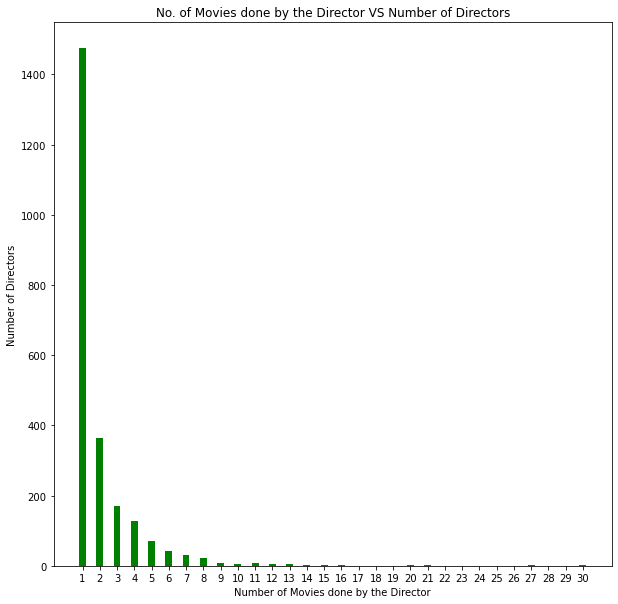

In [1356]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.xlabel("Number of Movies done by the Director")
plt.ylabel("Number of Directors")
plt.title("No. of Movies done by the Director VS Number of Directors")
plt.bar(label, counts, color ='green', width = 0.4)
plt.xticks(label, label)
plt.show()

<AxesSubplot:xlabel='runtime', ylabel='Density'>

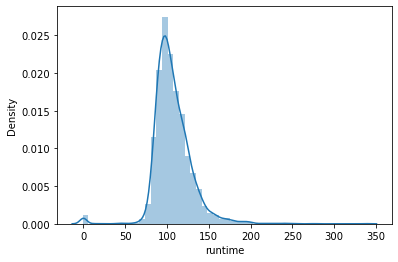

In [1357]:
warnings.filterwarnings("ignore")
sb.distplot(df2['runtime'],kde=True)

<AxesSubplot:xlabel='budget', ylabel='Density'>

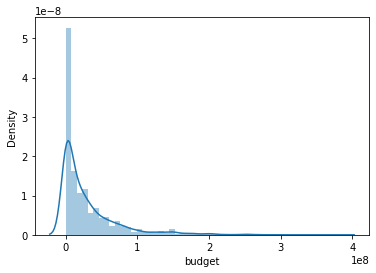

In [1358]:
sb.distplot(df2['budget'],kde=True)

<AxesSubplot:xlabel='popularity', ylabel='Density'>

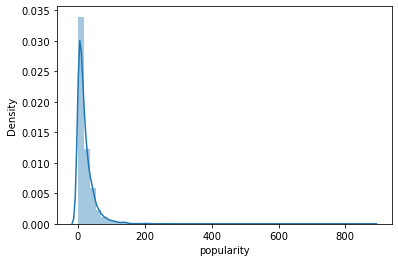

In [1359]:
sb.distplot(df2['popularity'],kde=True)

<AxesSubplot:xlabel='revenue', ylabel='Density'>

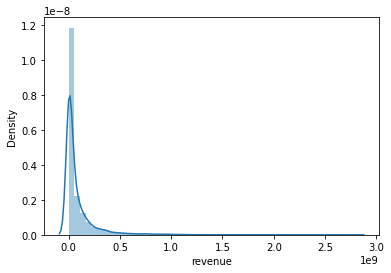

In [1360]:
sb.distplot(df2['revenue'],kde=True)

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

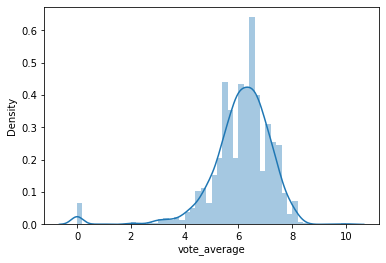

In [1361]:
sb.distplot(df2['vote_average'],kde=True)

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

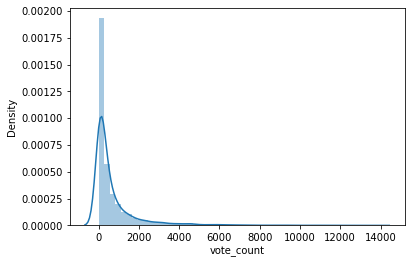

In [1362]:
sb.distplot(df2['vote_count'],kde=True)

<AxesSubplot:xlabel='male_count', ylabel='Density'>

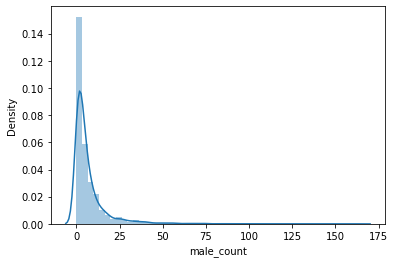

In [1363]:
sb.distplot(df2['male_count'],kde=True) 

<AxesSubplot:xlabel='female_count', ylabel='Density'>

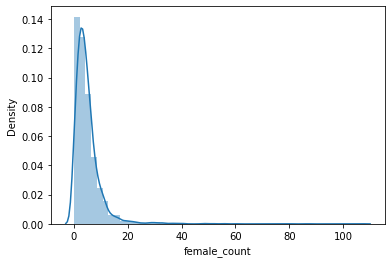

In [1364]:
sb.distplot(df2['female_count'],kde=True)

<AxesSubplot:xlabel='undefined_gender_count', ylabel='Density'>

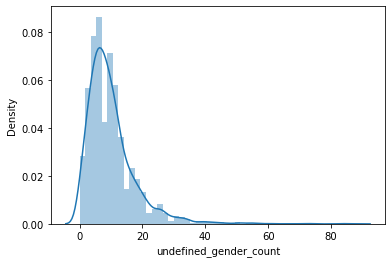

In [1365]:
sb.distplot(df2['undefined_gender_count'],kde=True)

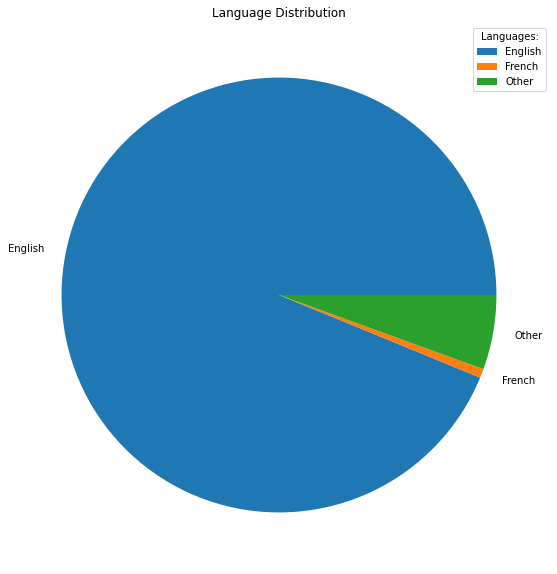

In [1366]:
lang = dict(df2.original_language.value_counts())
counts = []
labels = []
languages_rev = dict(zip(languages.values(), languages.keys()))
# counts.append(lang[0])
t = 0
for i in lang.keys():
    if(i == 0):
        counts.append(lang[i])
    elif(i == 1):
        counts.append(lang[i])
    else:
        t += lang[i]
counts.append(t)
labels.append("English")
labels.append("French") 
labels.append("Other") 

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.title("Language Distribution")
plt.pie(counts, labels = labels)
plt.legend(title = "Languages:")
plt.show() 

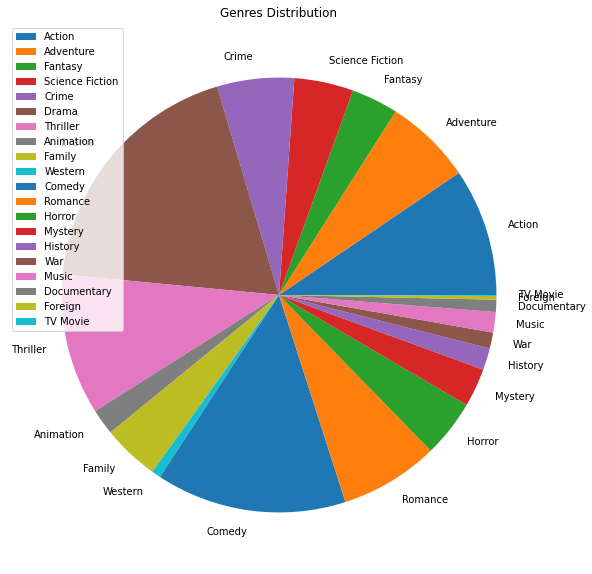

In [1367]:
genres_counts = [0]*len(genres)
genres_rev = dict(zip(genres.values(), genres.keys()))
for i in range(len(df2)):
    res = df2.loc[i, "genres"]
    for j in res:
        genres_counts[j] += 1
labels = []
for i in range(len(genres_rev)):
    labels.append(genres_rev[i])
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.title("Genres Distribution")
plt.pie(genres_counts, labels = labels)
plt.legend()
plt.show() 

In [1368]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   budget                  4803 non-null   int64  
 1   id                      4803 non-null   int64  
 2   original_title          4803 non-null   object 
 3   overview                4803 non-null   object 
 4   popularity              4803 non-null   float64
 5   release_date            4803 non-null   object 
 6   revenue                 4803 non-null   int64  
 7   runtime                 4803 non-null   float64
 8   tagline                 4803 non-null   object 
 9   title                   4803 non-null   object 
 10  vote_average            4803 non-null   float64
 11  vote_count              4803 non-null   int64  
 12  genres                  4803 non-null   object 
 13  keywords                4803 non-null   object 
 14  production_companies    4803 non-null   

### DROP Characters Varies a lot and not many insights since varies a lot in the same franchise

In [1369]:
# char_counts = [0]*len(character)
# char_rev = dict(zip(character.values(), character.keys()))
# for i in range(len(df2)):
#     res = df2.loc[i, "characters"]
#     for j in res:
#         char_counts[j] += 1
        
        
        
# labels = []
# for i in range(len(genres_rev)):
#     labels.append(genres_rev[i])
# f = plt.figure()
# f.set_figwidth(10)
# f.set_figheight(10)
# plt.title("Genres Distribution")
# plt.pie(genres_counts, labels = labels)
# plt.legend()
# plt.show() 

In [1370]:
# char_counts[994]

In [1371]:
# char_rev

# Making a custom one hot encoding function for using with the attributes with array values

In [1372]:
def one_hot_encode_arr_attri(dummy_no, data, encode_dict, attri):
    #first figure out
    dataf = data.copy()
    list_counts = [0] * len(encode_dict)
    for i in range(len(dataf)):
        try:
            res = json.loads(df2.loc[i, attri])
        except:
            res = df2.loc[i, attri]
        
        for j in res:
            list_counts[j] += 1
            
    encode_dict = dict(zip(encode_dict.values(), encode_dict.keys()))
    final_dict = {}
    for i in range(len(encode_dict)):
        final_dict[i] = list_counts[i]
    top_list = list(dict(sorted(final_dict.items(), key=lambda x:x[1], reverse=True)[:dummy_no]).keys())
    
    dummy_data = np.zeros(len(dataf)*dummy_no).reshape(dummy_no,len(dataf))
    
    c = 0
    for i in range(len(dataf)):
        try:
            res = json.loads(df2.loc[i, attri])
        except:
            res = df2.loc[i, attri]
        for j in res:
            if(j in top_list):
                ind = top_list.index(j)
                dummy_data[ind][i] = 1
    
    dataf.drop(attri, axis=1, inplace=True)
    for i in range(len(top_list)):
        dataf[encode_dict[top_list[i]].lower().replace(' ', '_')] = dummy_data[i].tolist()
    return dataf

In [1373]:
data = one_hot_encode_arr_attri(19, df2, genres, 'genres')
data = one_hot_encode_arr_attri(10, data, production_countries, "production_countries")
data = one_hot_encode_arr_attri(10, data, production_companies, "production_companies")
data = one_hot_encode_arr_attri(10, data, languages, "spoken_languages")

In [1374]:
data.to_csv('tmdb_prepro.csv')

### year-wise distribution 

In [1375]:
for i in range(len(data)):
    data.loc[i, "release_date"] = data.loc[i, "release_date"][:4]
date_dic = dict(data["release_date"].value_counts())

In [1376]:
mad, mid = sorted(list(date_dic.keys()))[-1], sorted(list(date_dic.keys()))[1]

In [1377]:
labels = []
mid = int(mid)
mad = int(mad)
for i in range(mid, mad+1):
    labels.append(i)

date_counts = [0] * len(labels)
for i in date_dic.keys():
    if(i != ""):
        date_counts[labels.index(int(i))] = date_dic[i]

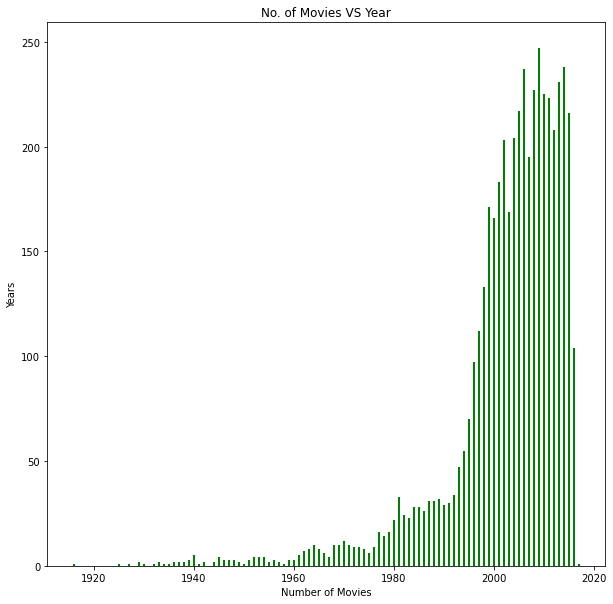

In [1378]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.xlabel("Number of Movies")
plt.ylabel("Years")
plt.title("No. of Movies VS Year")
plt.bar(labels, date_counts, color ='green', width = 0.4)
plt.show()

<AxesSubplot:xlabel='release_date', ylabel='Density'>

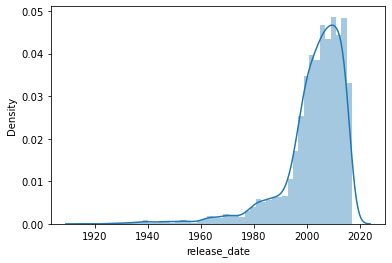

In [1379]:
for i in range(len(data)):
    if(data.loc[i, "release_date"] == ""):
        break
data.drop([i], axis=0, inplace=True)
date_dic = dict(data["release_date"].value_counts())
d = data["release_date"].astype(int)
sb.distplot(d,kde=True)